In [1]:
import pandas as pd
import numpy as np
import import_ipynb
import plot
import clustering_models 
import utils
import topic_modeling

importing Jupyter notebook from plot.ipynb
importing Jupyter notebook from clustering_models.ipynb
importing Jupyter notebook from utils.ipynb
importing Jupyter notebook from topic_modeling.ipynb


In [2]:
PATH = 'PV-DM/'

# Doc2Vec PV-DM

In [3]:
# Load cluster dataset for Doc2Vec dbow - title
DATA_FILE_TITLE = '../embedding/data/embedding_pvdm_title.csv'
df_title = pd.read_csv(DATA_FILE_TITLE, engine='python')
df_title.head()

id                                              title  \
0  704.0001  calculation prompt diphoton production cross s...   
1  704.0002             sparsitycertifying graph decomposition   
2  704.0003  evolution earthmoon system based dark matter f...   
3  704.0004  determinant stirling cycle number count unlabe...   
4  704.0005                                             dyadic   

                                     title_embedding  
0  [ 0.00985109 -0.02282911 -0.1018036  -0.046252...  
1  [ 0.0137121  -0.01596395 -0.09016363 -0.009310...  
2  [ 0.02228169  0.03429158  0.03522166  0.063652...  
3  [ 0.00917424 -0.01823316 -0.02324954 -0.043584...  
4  [-0.02570826  0.00543653 -0.07092233 -0.010871...

In [4]:
df_title['id'] = df_title['id'].astype(str)
df_title['title'] = df_title['title'].astype(str)
df_title['title_embedding'] = df_title['title_embedding'].astype(str)

In [5]:
# Load cluster dataset for Doc2Vec dbow - abstract
DATA_FILE_ABSTRACT = '../embedding/data/embedding_pvdm_abstract.csv'
df_abstract = pd.read_csv(DATA_FILE_ABSTRACT, engine='python')
df_abstract.head()

id                                           abstract  \
0  704.0001  fully differential calculation perturbative qu...   
1  704.0002  describe new algorithm pebble game color use o...   
2  704.0003  evolution earthmoon system described dark matt...   
3  704.0004  show determinant stirling cycle number count u...   
4  704.0005  paper show compute norm alphage using dyadic g...   

                                  abstract_embedding  
0  [-0.18940252  0.21834914  0.09810812  0.053028...  
1  [ 0.11950953 -0.10151526 -0.30039144 -0.055305...  
2  [-0.04490609  0.06848782 -0.01967597  0.153148...  
3  [-0.11738034  0.06538844 -0.08068271 -0.037309...  
4  [ 7.02065509e-03  2.01683166e-03 -1.63785249e-...

In [6]:
corpus_embeddings_title = np.array(utils.column_to_array(df_title, 'title_embedding')).astype(np.float64) 

In [7]:
corpus_embeddings_abstract = np.array(utils.column_to_array(df_abstract, 'abstract_embedding')).astype(np.float64) 

### K-means clustering

In [8]:
model_title = clustering_models.knn_clustering(corpus_embeddings_title, 15)

In [9]:
model_abstract = clustering_models.knn_clustering(corpus_embeddings_abstract, 15)

##### Print title clusters:

In [10]:
top_n_words_title = topic_modeling.topic_modeling(df_title, model_title.labels_, 'title', PATH + 'k-means_title')

Cluster 0 ->  [('star', 0.0315002001496823), ('model', 0.029879437404850516), ('state', 0.02462821615114285)]
['determinant stirling cycle number count unlabeled acyclic singlesource automaton', 'iterated integral loop product', 'stochastic lie group integrator', 'alma ideal probe solar chromosphere', 'spectroscopic property polarons strongly correlated system exact diagrammatic monte carlo method', 'convergence discrete dipole approximation theoretical analysis', 'limit relation entropy channel capacity per unit cost', 'intelligent location simultaneously active acoustic emission source part', 'intelligent location simultaneously active acoustic emission source part', 'operator algebra associated unitary commutation relation']

Cluster 1 ->  [('effect', 0.060934729502384995), ('field', 0.038770430532737946), ('function', 0.028775300031408012)]
['dyadic', 'fillingfactordependent magnetophonon resonance graphene', 'probing nonstandard neutrino interaction supernova neutrino', 'intellige

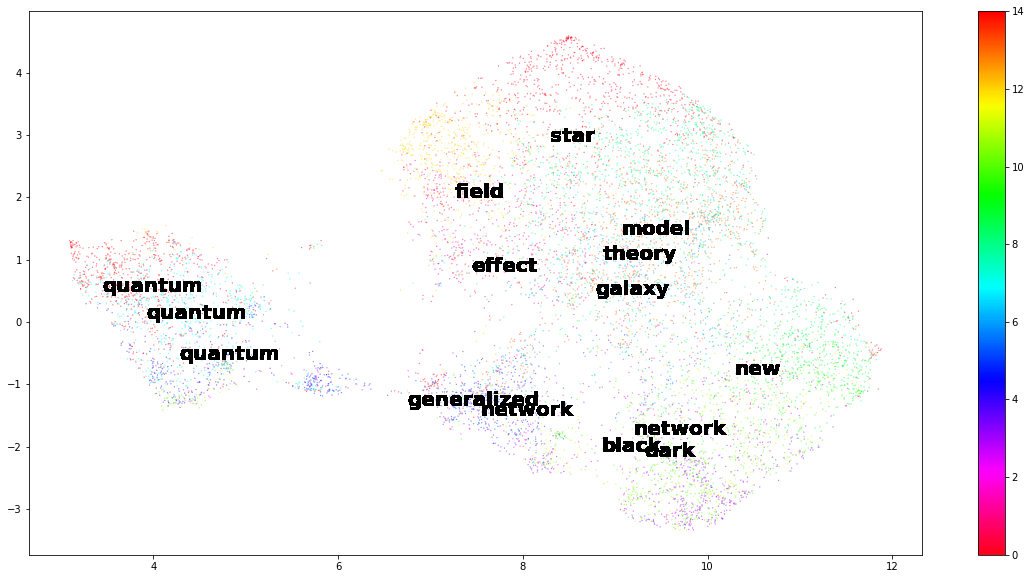

In [11]:
words = []
for n in top_n_words_title:
    words.append(top_n_words_title[n][0][0])
plot.topic_plot_umap(corpus_embeddings_title, model_title.labels_, words, PATH + 'k-means_title_topic')

##### Print abstract clusters:

In [12]:
top_n_words_abstract = topic_modeling.topic_modeling(df_abstract, model_abstract.labels_, 'abstract', PATH + 'k-means_abstract')

Cluster 0 ->  [('quantum', 0.013012461995200338), ('equation', 0.012750701246731427), ('state', 0.009123101070691114)]
['formation quasid spinwave waveform longitudinally magnetized stripe ferrimagnetic film observed using time spaceresolved brillouin light scattering technique linear regime found confinement decrease amplitude dynamic magnetization near lateral stripe edge thus socalled effective dipolar pinning dynamic magnetization take place edge nonlinear regime new stable spin wave packet propagating along waveguide structure transversal instability interaction side wall waveguide important observed experiment numerical simulation pulse evolution show shape formed waveform behavior strongly influenced confinement', 'performed rigorous theoretical convergence analysis discrete dipole approximation dda prove error measured quantity bounded sum linear quadratic term size dipole latter range dda applicability moreover linear term significantly smaller cubically noncubically shaped sc

Cluster 2 ->  [('temperature', 0.007355454812559541), ('magnetic', 0.007215679315781835), ('field', 0.007092162141183944)]
['partial cube isometric subgraphs hypercubes structure graph defined mean semicubes djokovics winklers relation play important role theory partial cube structure employed paper characterize bipartite graph partial cube arbitrary dimension new characterization established new proof known result given operation cartesian product pasting expansion contraction process utilized paper construct new partial cube old one particular isometric lattice dimension finite partial cube obtained mean operation calculated', 'recently bruinier ono classified cusp form sumninfty afnq slambdagammanchicap mathbbzq satisfy certain distribution property modulo odd prime paper using rankincohen bracket extend result modular form half integral weight prime application main theorem derive distribution property modulo prime trace singular modulus hurwitz class number also study analogue new

Cluster 8 ->  [('galaxy', 0.02887512936618763), ('xray', 0.01607122357611179), ('cluster', 0.012626238935133543)]
['work evaluate lifetime doubly charmed baryon carefully calculate nonspectator contribution quark level cabibbosuppressed diagram also included hadronic matrix element evaluated simple nonrelativistic harmonic oscillator model numerical result generally consistent obtained author used diquark model however theoretical prediction lifetime one order larger upper limit set recent selex measurement discrepancy would clarified future experiment accurate experiment still confirms value selex collaboration must unknown mechanism explored', 'give prescription compute callias index using regulator exponential function find agreement old result odd dimension show problem computing dimension modulus space selfdual string formulated index problem evendimensional loopspace think regulator used letter applied index problem', 'present recent advance understanding ground excited state ele

Cluster 13 ->  [('wave', 0.01237797385818099), ('growth', 0.009930371677449234), ('network', 0.009599212025558352)]
['describe new algorithm pebble game color use obtain characterization family sparse graph algorithmic solution family problem concerning tree decomposition graph special instance sparse graph appear rigidity theory received increased attention recent year particular colored pebble generalize strengthen previous result lee streinu give new proof tuttenashwilliams characterization arboricity also present new decomposition certifies sparsity based pebble game color work also expose connection pebble game algorithm previous sparse graph algorithm gabow gabow westermann hendrickson', 'result spectroscopic observation intermediate polar hya quiescence presented spinmodulated radial velocity consistent outer disc origin detected first time spin pulsation modulated velocity near velocity consistent material circulating outer edge accretion disc suggesting corotation accretion cu

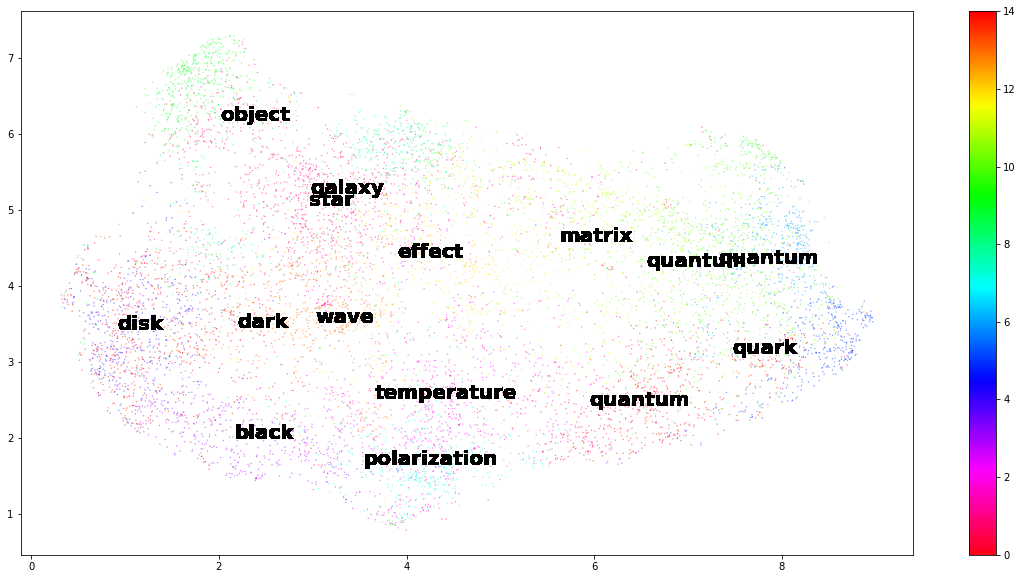

In [13]:
words = []
for n in top_n_words_abstract:
    words.append(top_n_words_abstract[n][0][0])
plot.topic_plot_umap(corpus_embeddings_abstract, model_abstract.labels_, words, PATH + 'k-means_abstract_topic')

#### Umap dimensional reduction - title

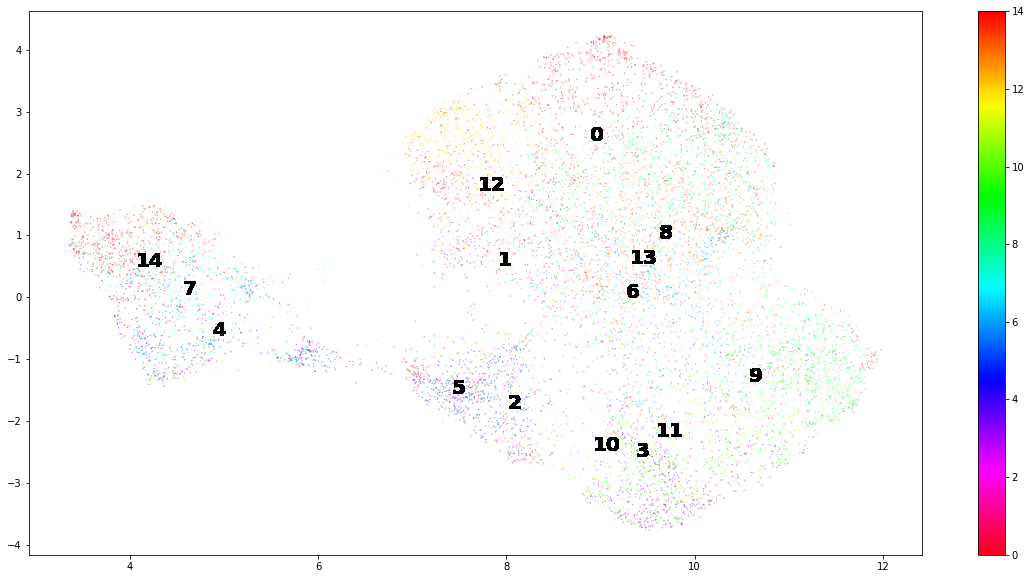

In [14]:
plot.plot_umap(corpus_embeddings_title, model_title.labels_, PATH + 'k-means_abstract')

#### Pca dimensional reduction - title

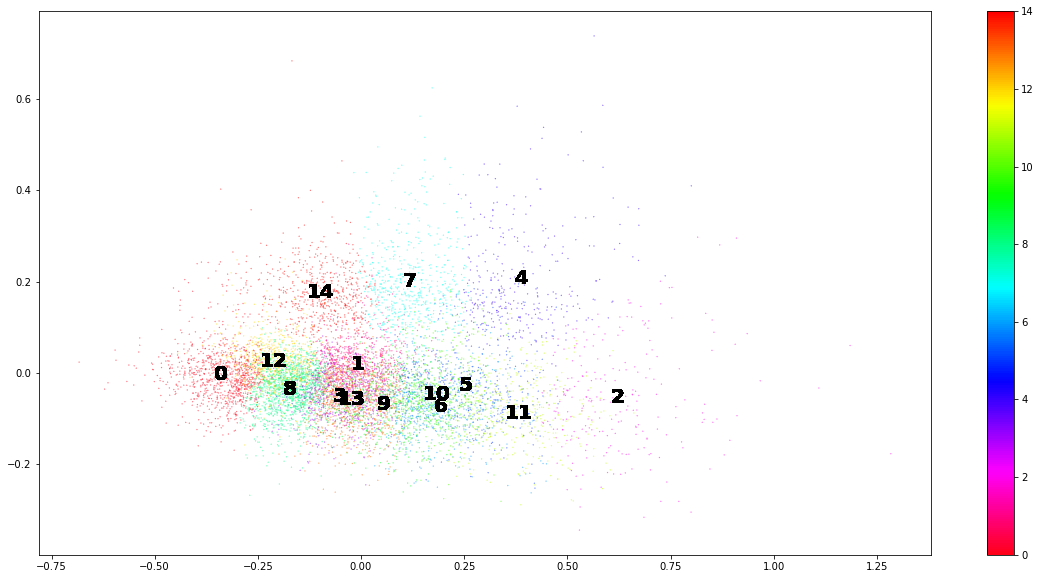

In [15]:
plot.plot_pca(corpus_embeddings_title, model_title.labels_, PATH + 'k-means_title')

#### Umap dimensional reduction - abstract

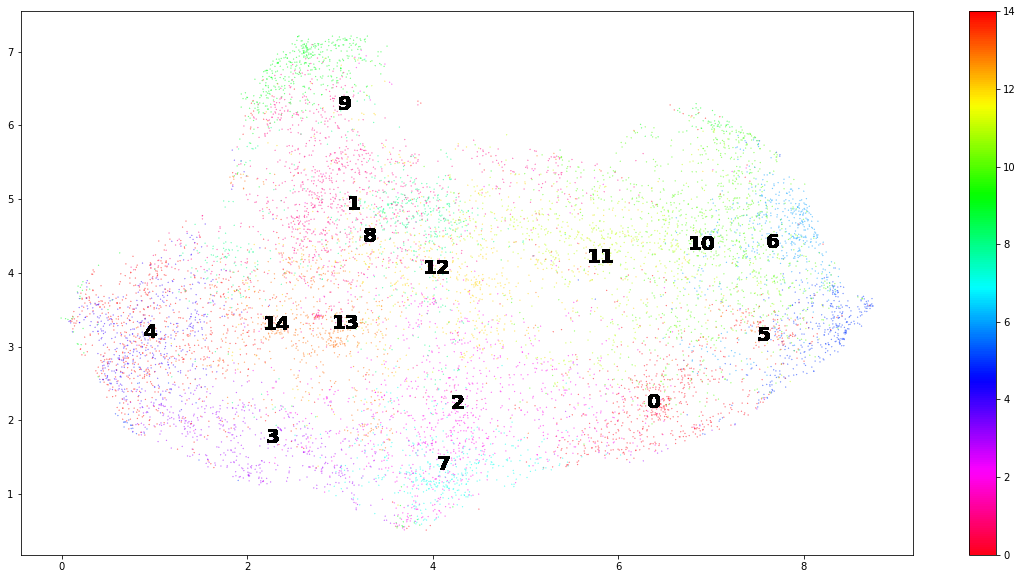

In [16]:
plot.plot_umap(corpus_embeddings_abstract, model_abstract.labels_, PATH + 'k-means_abstract')

#### Pca dimensional reduction - abstract

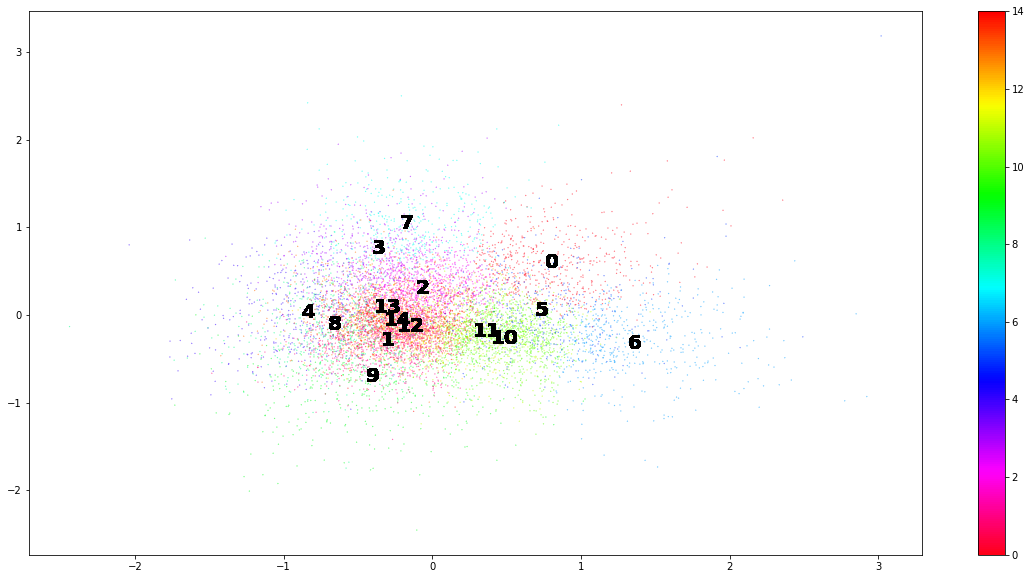

In [17]:
plot.plot_pca(corpus_embeddings_abstract, model_abstract.labels_, PATH + 'k-means_abstract')

### HDBSCAN clustering

In [36]:
model_title = clustering_models.dbscan(corpus_embeddings_title, 7, 4, 10)

In [19]:
model_abstract = clustering_models.dbscan(corpus_embeddings_abstract, 5, 4, 15)

##### Print title clusters:

In [37]:
top_n_words_title = topic_modeling.topic_modeling(df_title, model_title.labels_, 'title', PATH + 'hdbscan_title')

Cluster 0 ->  [('quantization', 0.1014285016240744), ('quantum', 0.08829650559030847), ('equation', 0.06998070035001802)]
['quest generalized callias index theorem', 'nonequilibrium entropy limiter lattice boltzmann method', 'generalized regularly discontinuous solution einstein equation', 'capacity multipleantenna fading channel quantized precoding matrix', 'renormalized quasiparticle antiferromagnetic state hubbard model', 'possibility gapless spin liquid state onedimensionalization', 'blazar spectral sequence glast', 'equilibrium problem limiting eigenvalue distribution banded toeplitz matrix', 'inapproximability maximum weighted edge biclique application', 'plasmon amplification stimulated emission terahertz frequency graphene']

Cluster 1 ->  [('medium', 0.1836355477674251), ('distribution', 0.14443576092562685), ('maser', 0.13668571741915359)]
['substructure wing cluster', 'measure multiverse probability inflation', 'neutron matter lowmomentum interaction', 'singular energy distr

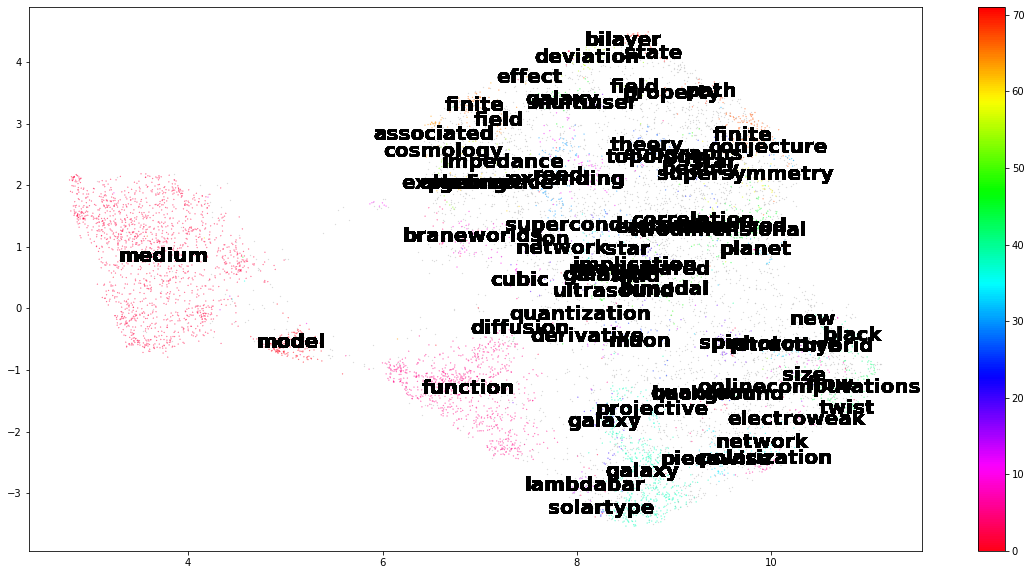

In [38]:
words = []
for n in top_n_words_title:
    words.append(top_n_words_title[n][0][0])
plot.topic_plot_umap(corpus_embeddings_title, model_title.labels_, words, PATH + 'hdbscan_title_topic')

##### Print abstract clusters:

In [22]:
top_n_words_abstract = topic_modeling.topic_modeling(df_abstract, model_abstract.labels_, 'abstract', PATH + 'hdbscan_abstract')

Cluster 0 ->  [('vub', 0.023265575302761327), ('form', 0.021921144800972174), ('noncrossing', 0.02168153675208694)]
['given finite irreducible coxeter group positive integer type sense classification finite coxeter group compute number decomposition coxeter element coxeter element subgroup type factorisation minimal sense sum rank equal rank exceptional type decomposition number computed first author type decomposition number computed goulden jackson albeit using somewhat different language explain extract type decomposition number result bona bousquet labelle leroux map enumeration formula type decomposition number new result used determine fixed positive integer fixed integer number multichains pile pile pil armstrong generalised noncrossing partition poset poset rank equal block structure prescribed demonstrate result implies known enumerative result ordinary generalised noncrossing partition via appropriate summation surprisingly result multichain enumeration new even original nonc

Cluster 49 ->  [('qpo', 0.035161620671688085), ('kilohertz', 0.03254643862852231), ('khz', 0.026055481539566227)]
['study heisenberg antiferromagnet square lattice nearestneighbor plaquette fourspin exchange introduced sandvik phys rev lett model undergoes quantum phase transition spontaneously dimerized phase neel order critical coupling show critical point approached dimerized side system exhibit strong fluctuation dimer background reflected presence lowenergy singlet mode simultaneous rise triplet quasiparticle density find singlet triplet mode high density condense transition signaling restoration lattice symmetry approach beyond meanfield theory term triplet excitation transition appears sharp however since method break near critical point argue make definite conclusion regarding order transition', 'help masslike function dimension energy equal misnersharp mass apparent horizon show first law thermodynamics apparent horizon derived friedmann equation various theory gravity includi

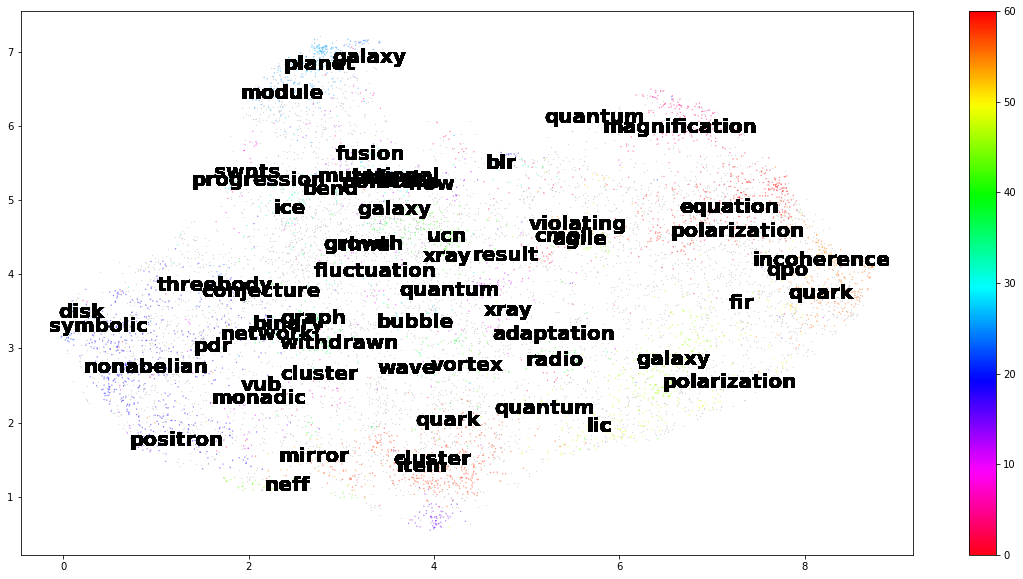

In [23]:
words = []
for n in top_n_words_abstract:
    words.append(top_n_words_abstract[n][0][0])
plot.topic_plot_umap(corpus_embeddings_abstract, model_abstract.labels_, words, PATH + 'hdbscan_abstract_topic')

#### Umap dimensional reduction - title

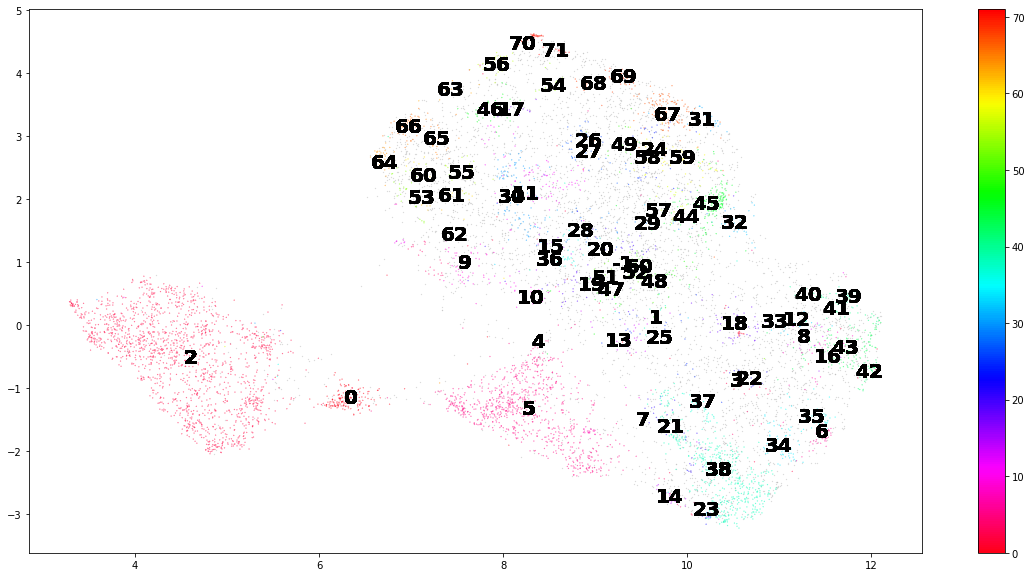

In [39]:
plot.plot_umap(corpus_embeddings_title, model_title.labels_, PATH + 'hdbscan_title' )

#### Pca dimensional reduction - title

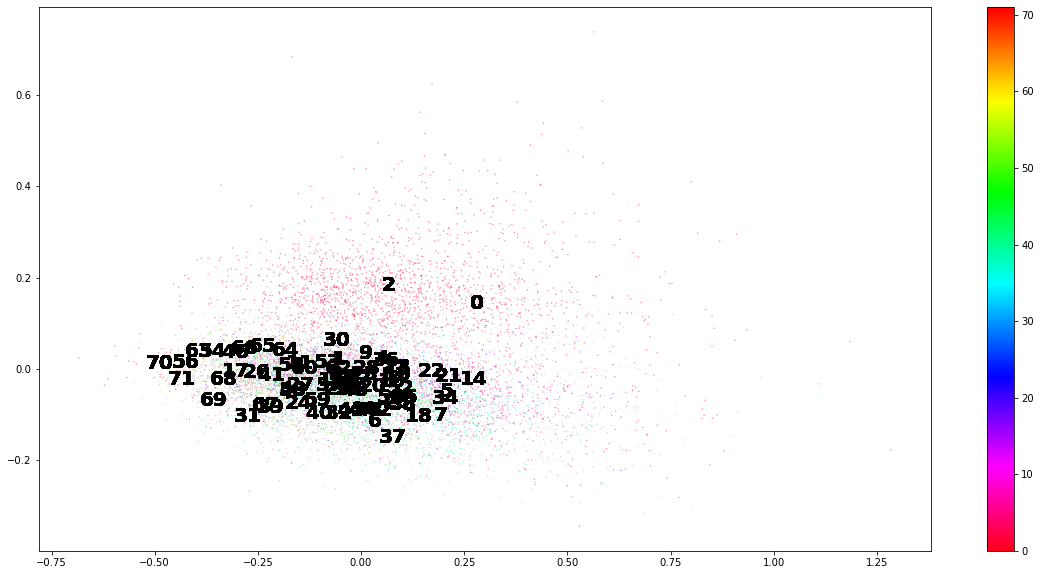

In [40]:
plot.plot_pca(corpus_embeddings_title, model_title.labels_, PATH + 'hdbscan_title')

### Agglomerative clustering

In [26]:
model_title = clustering_models.agglomerative(corpus_embeddings_title, 20, 'euclidean', 'cosine', None)

C:\Users\marik\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass affinity=euclidean, memory=cosine, connectivity=None as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [27]:
model_abstract = clustering_models.agglomerative(corpus_embeddings_abstract, 20, 'euclidean', 'cosine', None)

C:\Users\marik\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass affinity=euclidean, memory=cosine, connectivity=None as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


##### Print title clusters:

In [28]:
top_n_words_title = topic_modeling.topic_modeling(df_title, model_title.labels_, 'title', PATH + 'agglomerative_title')

Cluster 0 ->  [('effect', 0.05160241691343619), ('field', 0.042567691790476474), ('theory', 0.03520510975026435)]
['sparsitycertifying graph decomposition', 'lifetime doubly charmed baryon', 'fillingfactordependent magnetophonon resonance graphene', 'multilinear function series conditionally free probability amalgamation', 'phase diagram gaussiancore nematics', 'intelligent life cosmology', 'coulomb excitation unstable nucleus intermediate energy', 'formation density singularity ideal hydrodynamics freely cooling inelastic gas family exact solution', 'new experimental photonic flame effect feature', 'conformal field theory operator algebra']

Cluster 1 ->  [('theory', 0.03306610860837012), ('property', 0.030201925388273404), ('galaxy', 0.02309801131107843)]
['calculation prompt diphoton production cross section tevatron lhc energy', 'bosonic character atomic cooper pair across resonance', 'numerical solution shock ramp compression general material property', 'approximation extinction p

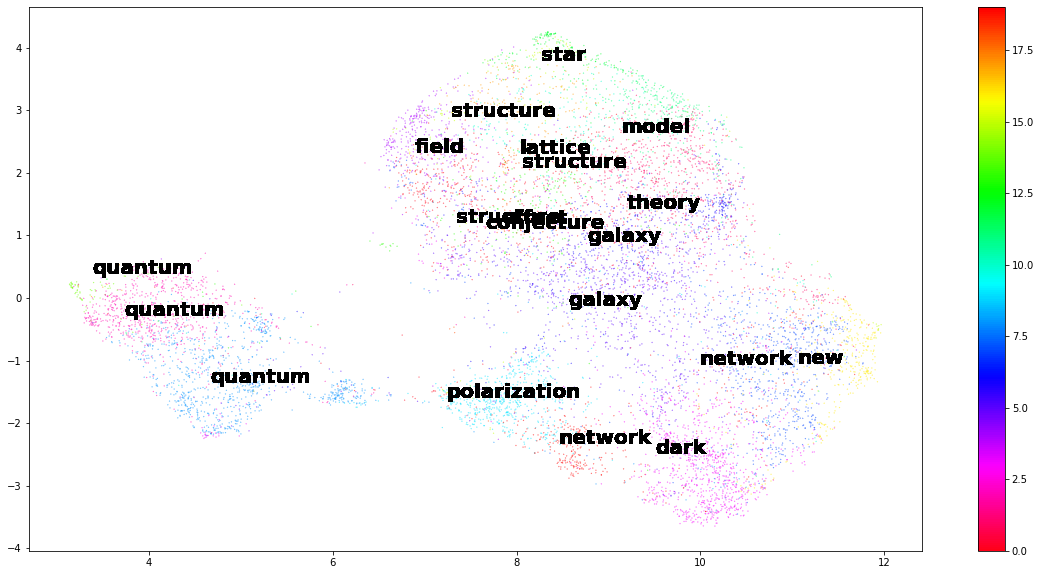

In [29]:
words = []
for n in top_n_words_title:
    words.append(top_n_words_title[n][0][0])
plot.topic_plot_umap(corpus_embeddings_title, model_title.labels_, words, PATH + 'agglomerative_title_topic')

##### Print abstract clusters:

In [30]:
top_n_words_abstract = topic_modeling.topic_modeling(df_abstract, model_abstract.labels_, 'abstract', PATH + 'agglomerative_abstract')

Cluster 0 ->  [('quantum', 0.01422238091764524), ('equation', 0.011848489708498012), ('state', 0.009696504973812263)]
['rather nonstandard quantum representation canonical commutation relation quantum mechanic system known polymer representation gained attention recent year due possible relation planck scale physic particular approach followed symmetric sector loop quantum gravity known loop quantum cosmology explore different aspect relation ordinary schroedinger theory polymer description paper two part first one derive polymer quantum mechanic starting ordinary schroedinger theory show polymer description arises appropriate limit second part consider continuum limit theory namely reverse process one start discrete theory try recover back ordinary schroedinger quantum mechanic consider several example interest including harmonic oscillator free particle simple cosmological model', 'paper present algorithm computing hecke eigensystems hilbertsiegel cusp form real quadratic field narro

Cluster 4 ->  [('flux', 0.007246685402679923), ('result', 0.00712830908131185), ('line', 0.006826267648821153)]
['zerodivisors zds derived cayleydickson process cdp ndimensional hypercomplex number power least represent singularity approach infinite fractal therebyscalefree network integer greater power generates metafractal sky interpreted strut constant ensemble octahedral vertex figure called boxkites fundamental building block zds remarkably simple bitmanipulation rule recipe provide tool transforming one fractal genus others within context wolfram class complexity', 'propose extrapolation technique allows accuracy improvement discrete dipole approximation computation performance technique studied empirically based extensive simulation test case using many different discretizations quality extrapolation improves refining discretization reaching extraordinary performance especially cubically shaped particle two order magnitude decrease error demonstrated also propose estimate extrap

Cluster 11 ->  [('network', 0.02628104341980532), ('node', 0.00804149816761732), ('work', 0.00686199764507779)]
['analyze possibility probing nonstandard neutrino interaction nsi short detection neutrino produced future galactic supernova snwe consider effect nsi neutrino propagation envelope within threeneutrino framework paying special attention inclusion nsiinduced resonant conversion may take place deleptonised inner layer study possibility detecting nsi effect megaton water cherenkov detector either modulation effect spectrum due passage shock wave envelope time dependence electron fraction iii earth matter effect finally possible detectability neutronization burst find spectrum exhibit dramatic feature due internal nsiinduced resonant conversion occurs nonuniversal nsi strength small flavorchanging nsi', 'present theoretical framework plasma turbulence astrophysical plasma solar wind interstellar medium galaxy cluster accretion disk key assumption turbulence anisotropic respect m

Cluster 18 ->  [('galaxy', 0.025560784726430218), ('xray', 0.014616078664639867), ('emission', 0.011725821065387764)]
['work evaluate lifetime doubly charmed baryon carefully calculate nonspectator contribution quark level cabibbosuppressed diagram also included hadronic matrix element evaluated simple nonrelativistic harmonic oscillator model numerical result generally consistent obtained author used diquark model however theoretical prediction lifetime one order larger upper limit set recent selex measurement discrepancy would clarified future experiment accurate experiment still confirms value selex collaboration must unknown mechanism explored', 'recently babar belle experiment found evidence neutral mixing paper discus constraint strong phase difference decay measurement mixing parameter factory sensitivity measurement mixing parameter estimated besiii experiment peak also make estimate measurement mixing rate finally sensitivity strong phase difference besiii obtained using data 

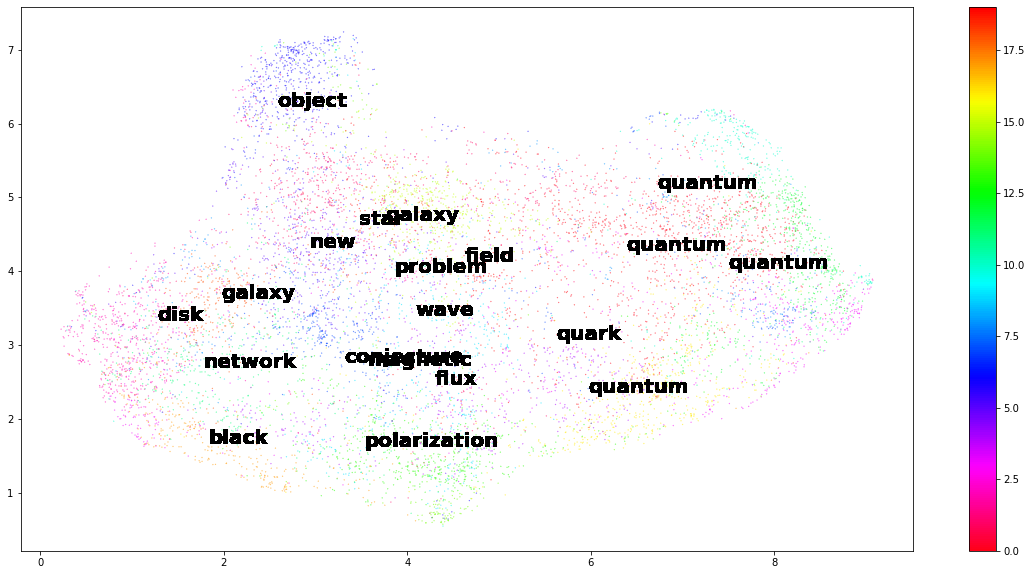

In [31]:
words = []
for n in top_n_words_abstract:
    words.append(top_n_words_abstract[n][0][0])
plot.topic_plot_umap(corpus_embeddings_abstract, model_abstract.labels_, words, PATH + 'hdbscan_abstract_topic')

#### Umap dimensional reduction - title

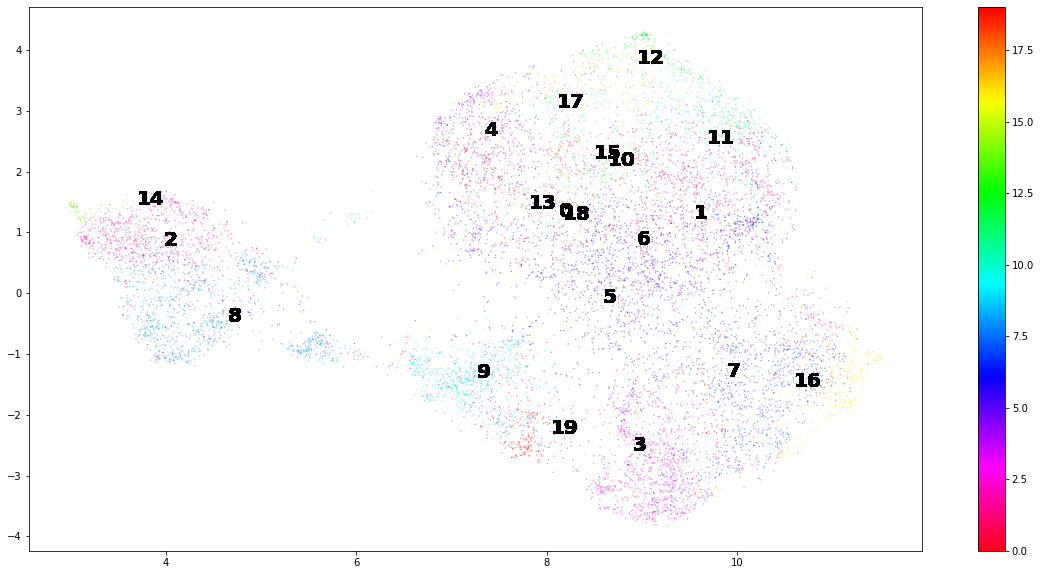

In [32]:
plot.plot_umap(corpus_embeddings_title, model_title.labels_, PATH + 'agglomerative_title')

#### Pca dimensional reduction - title

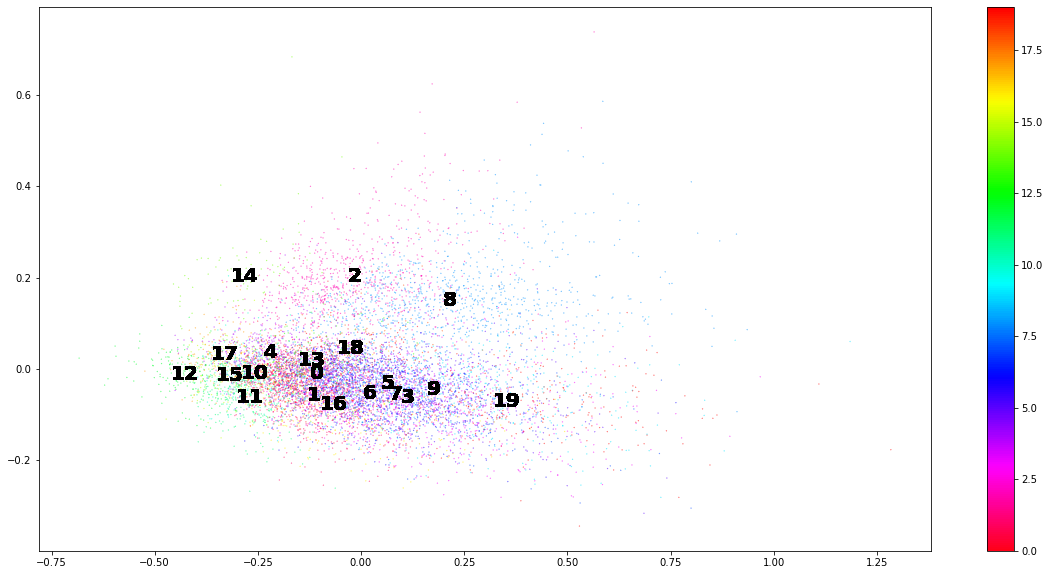

In [33]:
plot.plot_pca(corpus_embeddings_title, model_title.labels_, PATH + 'agglomerative_title')

#### Umap dimensional reduction - abstact

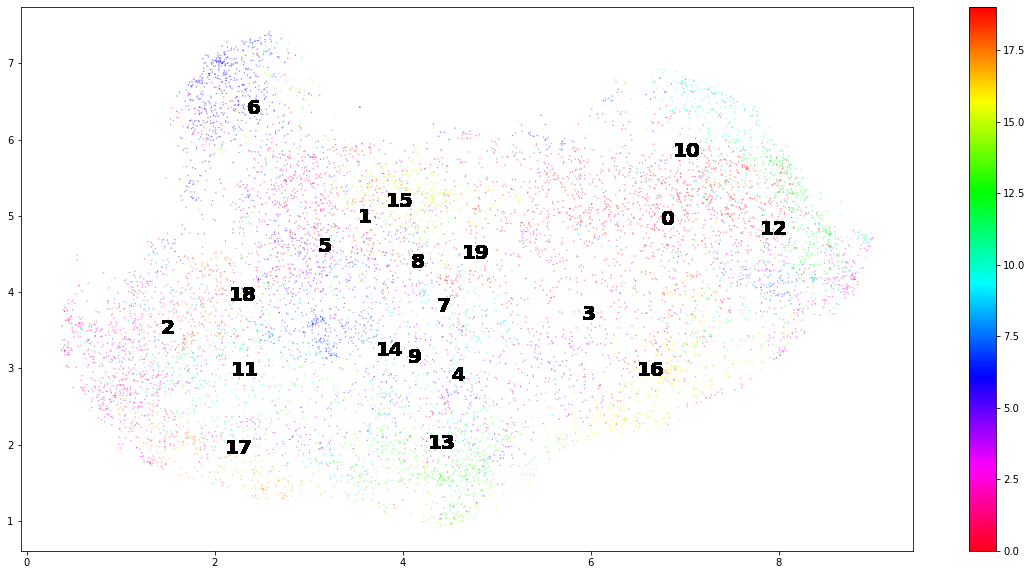

In [34]:
plot.plot_umap(corpus_embeddings_abstract, model_abstract.labels_, PATH + 'agglomerative_abstract_topic')

#### Pca dimensional reduction - abstact

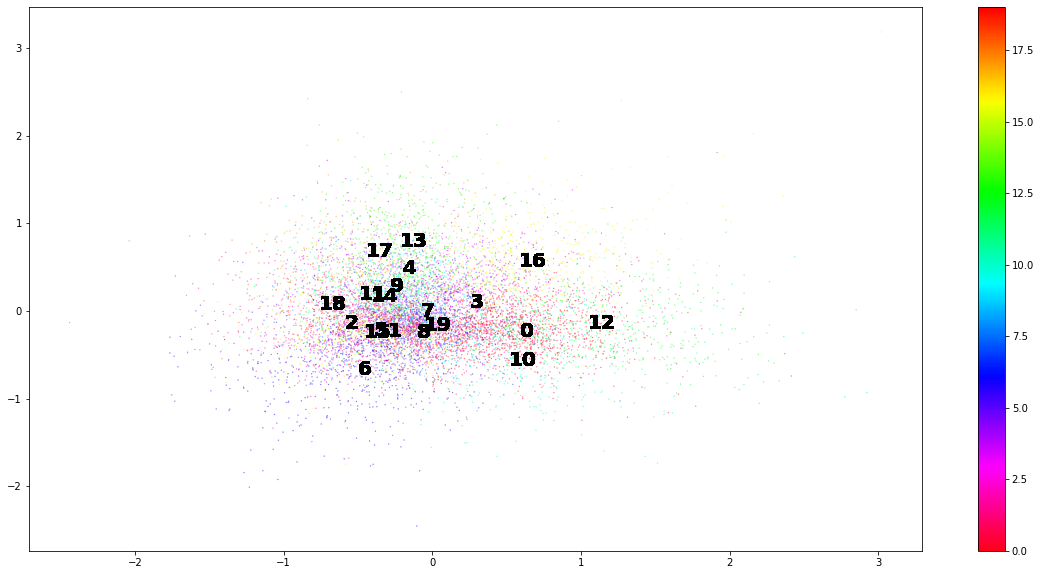

In [35]:
plot.plot_pca(corpus_embeddings_abstract, model_abstract.labels_, PATH + 'agglomerative_abstract_topic')